# Assignment 1



## Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. Perform following tasks:
1.	Pre-process the dataset.
2.	Identify outliers.
3.	Check the correlation.
4.	Implement linear regression and random forest regression models.
5.	Evaluate the models and compare their respective scores like R2, RMSE, etc. Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset


In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#importing the dataset
df  = pd.read_csv("./uber.csv")

##  1.	Pre-process the dataset.

In [ ]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [ ]:
df.info() #To get the required information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8918 entries, 0 to 8917
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         8918 non-null   int64  
 1   key                8918 non-null   object 
 2   fare_amount        8917 non-null   float64
 3   pickup_datetime    8917 non-null   object 
 4   pickup_longitude   8917 non-null   float64
 5   pickup_latitude    8917 non-null   float64
 6   dropoff_longitude  8917 non-null   float64
 7   dropoff_latitude   8917 non-null   float64
 8   passenger_count    8917 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 627.2+ KB


In [ ]:
df.columns #TO get number of columns in the dataset

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [ ]:
df = df.drop(['Unnamed: 0', 'key'], axis= 1) #To drop unnamed column as it isn't required

In [ ]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [ ]:
df.shape #To get the total (Rows,Columns)

(8918, 7)

In [ ]:
df.dtypes #To get the type of each column

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8918 entries, 0 to 8917
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        8917 non-null   float64
 1   pickup_datetime    8917 non-null   object 
 2   pickup_longitude   8917 non-null   float64
 3   pickup_latitude    8917 non-null   float64
 4   dropoff_longitude  8917 non-null   float64
 5   dropoff_latitude   8917 non-null   float64
 6   passenger_count    8917 non-null   float64
dtypes: float64(6), object(1)
memory usage: 487.8+ KB


In [ ]:
df.describe() #To get statistics of each columns 

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,8917.00000,8917.000000,8917.000000,8917.000000,8917.000000,8917.000000
mean,11.44521,-72.700539,40.000828,-72.673399,40.005821,1.665358
std,10.41732,12.320446,5.895643,9.855862,5.880433,1.286880
min,2.50000,-748.016667,-74.009697,-75.350437,-73.994370,0.000000
25%,6.00000,-73.992015,40.734997,-73.991472,40.733642,1.000000
50%,8.50000,-73.981582,40.752407,-73.979908,40.752997,1.000000
75%,12.50000,-73.967155,40.767058,-73.963588,40.768180,2.000000
max,350.00000,40.770667,41.366138,40.761672,41.366138,6.000000


### Filling Missing values

In [ ]:
df.isnull().sum() 

fare_amount          1
pickup_datetime      1
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    1
dropoff_latitude     1
passenger_count      1
dtype: int64

In [ ]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)

In [ ]:
df.isnull().sum() 

fare_amount          1
pickup_datetime      1
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    0
dropoff_latitude     0
passenger_count      1
dtype: int64

In [ ]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

### Column pickup_datetime is in wrong format (Object). Convert it to DateTime Format

In [ ]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce') 

In [ ]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
dtype: object

### To segregate each time of date and time

In [ ]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
             day= df.pickup_datetime.dt.day,
             month = df.pickup_datetime.dt.month,
             year = df.pickup_datetime.dt.year,
             dayofweek = df.pickup_datetime.dt.dayofweek)

In [ ]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,19.0,7.0,5.0,2015.0,3.0
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,20.0,17.0,7.0,2009.0,4.0
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,21.0,24.0,8.0,2009.0,0.0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,8.0,26.0,6.0,2009.0,4.0
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5.0,17.0,28.0,8.0,2014.0,3.0


In [ ]:
# drop the column 'pickup_daetime' using drop()
# 'axis = 1' drops the specified column

df = df.drop('pickup_datetime',axis=1)


In [ ]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19.0,7.0,5.0,2015.0,3.0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20.0,17.0,7.0,2009.0,4.0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21.0,24.0,8.0,2009.0,0.0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8.0,26.0,6.0,2009.0,4.0
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,17.0,28.0,8.0,2014.0,3.0


In [ ]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
hour                 float64
day                  float64
month                float64
year                 float64
dayofweek            float64
dtype: object

## Checking outliers and filling them 

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

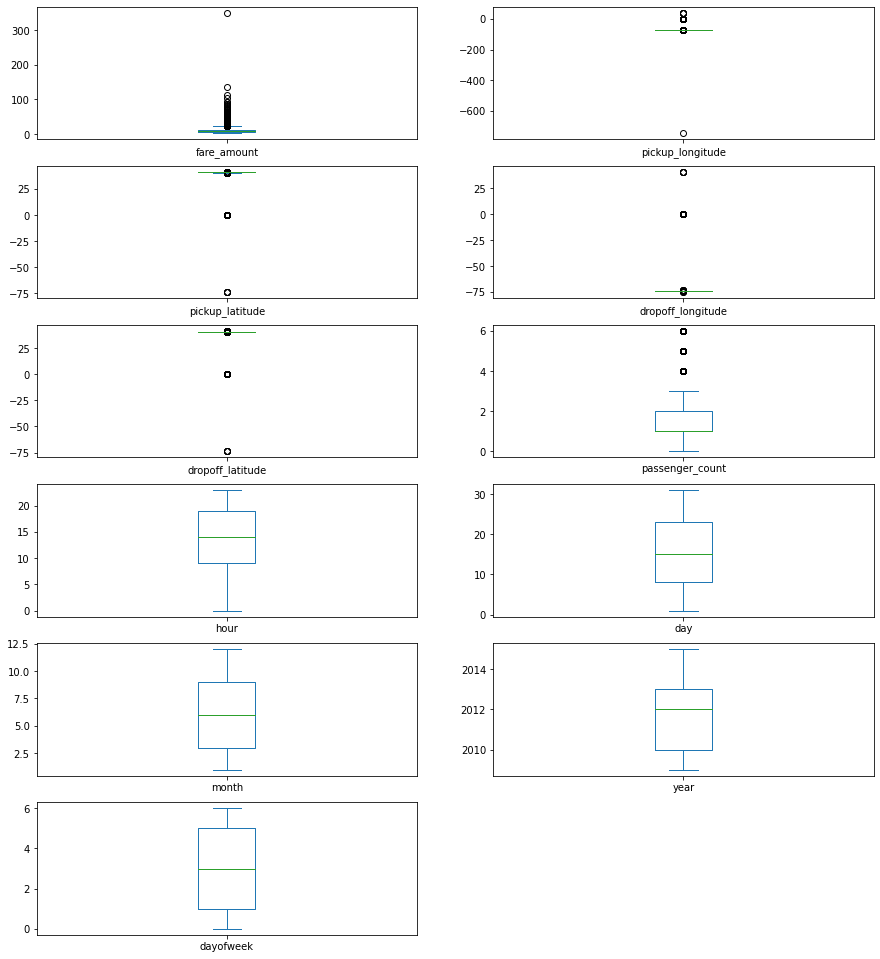

In [ ]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot to check the outliers

In [ ]:
#Using the InterQuartile Range to fill the values
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

In [ ]:
df = treat_outliers_all(df , df.iloc[: , 0::])

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

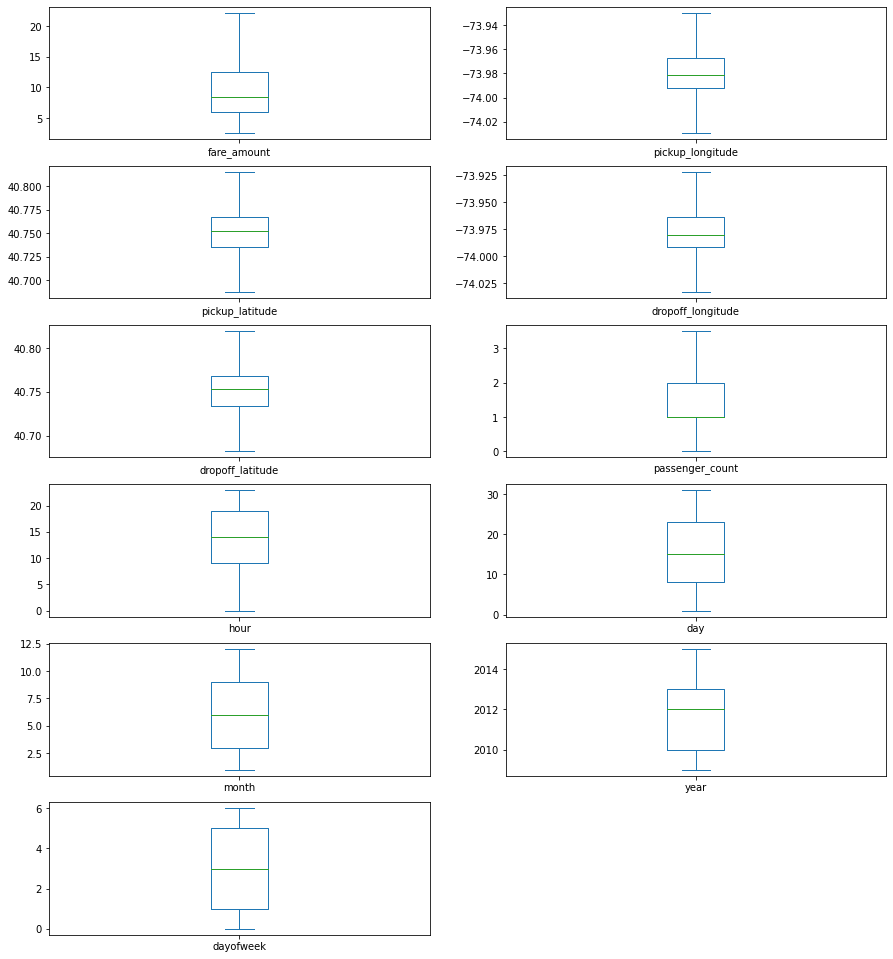

In [ ]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot shows that dataset is free from outliers

In [ ]:
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#pip install haversine
import haversine as hs  #Calculate the distance using Haversine to calculate the distance between to points. Can't use Eucladian as it is for flat surface.
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
        long1,lati1,long2,lati2 = [df['pickup_longitude'][pos],df['pickup_latitude'][pos],df['dropoff_longitude'][pos],df['dropoff_latitude'][pos]]
        loc1=(lati1,long1)
        loc2=(lati2,long2)
        c = hs.haversine(loc1,loc2)
        travel_dist.append(c)
    
print(travel_dist)
df['dist_travel_km'] = travel_dist
df.head()

[1.6833250775073447, 2.4575932783467835, 5.036384146783453, 1.661685753650294, 4.110211913288743, 0.0, 9.537624298955508, 0.8859948220429716, 2.3327142314177545, 4.889423641655177, 2.2508607308770285, 0.8859948220429716, 0.3022521108558365, 3.5812557740132496, 1.3099517093917648, 1.716279792276335, 0.7299665570466272, 2.515953547298386, 1.790321726187665, 1.0347050399795192, 2.4902472008677727, 0.9594701844599927, 1.2613897673437817, 1.7517650017211177, 6.1932445014761095, 2.736192584061414, 0.7232537124105735, 3.229443537425455, 1.4295172964395384, 2.233699311547041, 11.02371674587468, 1.8950491608266506, 1.9049353402365328, 3.1821178242889583, 4.400015037293744, 2.9230236888626995, 1.200213842045202, 2.635790807404098, 2.253613903554444, 9.201513417411665, 4.826533532872274, 1.2502926870845612, 0.7984742276755328, 0.840396152683202, 0.38519924001701444, 2.434346176233359, 3.127909533264099, 3.7346507724526368, 0.0, 4.504360509008704, 1.5579008497303448, 4.923160610490316, 7.683158068

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19.0,7.0,5.0,2015.0,3.0,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20.0,17.0,7.0,2009.0,4.0,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21.0,24.0,8.0,2009.0,0.0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8.0,26.0,6.0,2009.0,4.0,1.661686
4,16.0,-73.929865,40.744085,-73.973082,40.761247,3.5,17.0,28.0,8.0,2014.0,3.0,4.110212


In [ ]:
#Uber doesn't travel over 130 kms so minimize the distance 
df= df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (8917, 12)


In [ ]:
#Finding inccorect latitude (Less than or greater than 90) and longitude (greater than or less than 180)
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
                                   (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
                                   (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
                                   (df.dropoff_longitude > 90) |(df.dropoff_longitude < -90)
                                    ]

In [ ]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19.0,7.0,5.0,2015.0,3.0,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20.0,17.0,7.0,2009.0,4.0,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21.0,24.0,8.0,2009.0,0.0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8.0,26.0,6.0,2009.0,4.0,1.661686
4,16.0,-73.929865,40.744085,-73.973082,40.761247,3.5,17.0,28.0,8.0,2014.0,3.0,4.110212


In [ ]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
dist_travel_km       0
dtype: int64

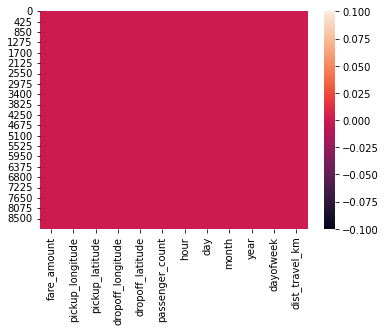

In [ ]:
sns.heatmap(df.isnull()) #Free for null values

In [ ]:
corr = df.corr() #Function to find the correlation

In [ ]:
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.165414,-0.114549,0.224611,-0.132872,-0.011858,-0.013400,-0.000422,0.039592,0.154025,0.027668,0.796337
pickup_longitude,0.165414,1.000000,0.273343,0.416039,0.091690,-0.015443,0.011009,-0.012864,0.007684,0.016840,-0.025352,0.062338
pickup_latitude,-0.114549,0.273343,1.000000,0.062492,0.516364,-0.011107,0.027841,-0.000063,0.000710,-0.003428,-0.032023,-0.079231
dropoff_longitude,0.224611,0.416039,0.062492,1.000000,0.266043,-0.017582,-0.064771,-0.005070,0.018502,0.029700,-0.011110,0.161266
dropoff_latitude,-0.132872,0.091690,0.516364,0.266043,1.000000,-0.023474,0.009796,0.000719,0.001376,0.004616,-0.032096,-0.068517
passenger_count,-0.011858,-0.015443,-0.011107,-0.017582,-0.023474,1.000000,0.030098,0.014889,0.010609,-0.003391,0.041723,-0.003816
hour,-0.013400,0.011009,0.027841,-0.064771,0.009796,0.030098,1.000000,0.005000,0.008108,0.001384,-0.095396,-0.029542
day,-0.000422,-0.012864,-0.000063,-0.005070,0.000719,0.014889,0.005000,1.000000,-0.017187,-0.012429,0.002717,-0.002736
month,0.039592,0.007684,0.000710,0.018502,0.001376,0.010609,0.008108,-0.017187,1.000000,-0.113887,-0.000273,0.027093
year,0.154025,0.016840,-0.003428,0.029700,0.004616,-0.003391,0.001384,-0.012429,-0.113887,1.000000,0.006451,0.028554


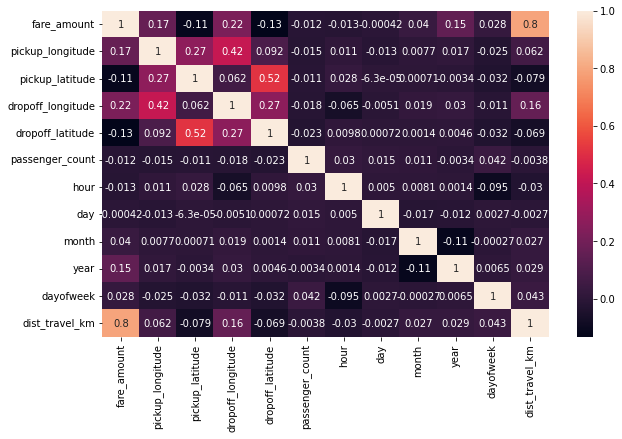

In [ ]:
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot = True) #Correlation Heatmap (Light values means highly correlated)

### Dividing the dataset into feature and target values 

In [ ]:
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]

In [ ]:
y = df['fare_amount']

### Dividing the dataset into training and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [ ]:
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
regression.intercept_ #To find the linear intercept

3513.1560366227445

In [ ]:
regression.coef_ #To find the linear coeeficient

array([ 2.45157804e+01, -8.64148972e+00,  2.09691239e+01, -1.49222398e+01,
       -5.80396570e-02,  8.23291252e-03,  1.84261826e-03,  4.42080591e-02,
        4.05858154e-01, -1.70956702e-02,  1.84851189e+00])

In [ ]:
prediction = regression.predict(X_test) #To predict the target values

In [ ]:
print(prediction)

[ 7.69314053  6.6503221   8.91691157 ... 11.19238826  5.11162265
  5.22366491]


In [ ]:
y_test

8916     6.1
3281     5.7
8614     8.5
7867    13.5
8579    13.0
        ... 
5103    19.5
4758     6.5
2004     7.7
6225     5.7
4648     7.7
Name: fare_amount, Length: 2943, dtype: float64

### Metrics Evaluation using R2, Mean Squared Error, Root Mean Sqared Error

In [ ]:
from sklearn.metrics import r2_score 

In [ ]:
r2_score(y_test,prediction)

0.6636741707173341

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
MSE = mean_squared_error(y_test,prediction)

In [ ]:
MSE L

9.717330964971087

In [ ]:
RMSE = np.sqrt(MSE)

In [ ]:
RMSE

3.1172633775430474

### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100) #Here n_estimators means number of trees you want to build before making the prediction

In [ ]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
y_pred

array([ 8.311,  6.465,  8.7  , ..., 10.129,  6.246,  4.565])

### Metrics evaluatin for Random Forest

In [ ]:
R2_Random = r2_score(y_test,y_pred)

In [ ]:
R2_Random

0.75201936145661

In [ ]:
MSE_Random = mean_squared_error(y_test,y_pred)

In [ ]:
MSE_Random

7.164807837597689

In [ ]:
RMSE_Random = np.sqrt(MSE_Random)

In [ ]:
RMSE_Random

2.676715867924291

# Assignment 2
2.	Classify the email using the binary classification method. Email Spam detection has two states: a) Normal State – Not Spam, b) Abnormal State – Spam. Use K-Nearest Neighbors and Support Vector Machine for classification. Analyze their performance.
Dataset link: The emails.csv dataset on the Kaggle https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

In [ ]:
df=pd.read_csv('./emails.csv')

In [ ]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [ ]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      1
allowing      1
ff            1
dry           1
Prediction    1
Length: 3002, dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.drop(['Email No.'],axis=1,inplace=True)
X = df.drop(['Prediction'],axis = 1)
y = df['Prediction']

In [ ]:
from sklearn.preprocessing import scale
X = scale(X)
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

##KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
print("Prediction",y_pred)

Prediction [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 1.]


In [ ]:
print("KNN accuracy = ",metrics.accuracy_score(y_test,y_pred))

KNN accuracy =  0.5294117647058824


In [ ]:
print("Confusion matrix",metrics.confusion_matrix(y_test,y_pred))

Confusion matrix [[16 23]
 [ 1 11]]


## SVM classifier

In [ ]:
# cost C = 1
model = SVC(C = 1)

# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

In [ ]:
metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[39,  0],
       [11,  1]])

In [ ]:
print("SVM accuracy = ",metrics.accuracy_score(y_test,y_pred))

SVM accuracy =  0.7843137254901961


# Assignment 3
## Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.
Dataset Description: The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling Perform following steps:
1.	Read the dataset.
2.	Distinguish the feature and target set and divide the data set into training and test sets.
3.	Normalize the train and test data.
4.	Initialize and build the model. Identify the points of improvement and implement the same.
5.	Print the accuracy score and confusion matrix.
 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #Importing the libraries

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")

## Preprocessing. 

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis= 1) #Dropping the unnecessary columns 

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Visualization

In [ ]:
def visualization(x, y, xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("No. of customers", fontsize=20)
    plt.legend()

In [ ]:
df_churn_exited = df[df['Exited']==1]['Tenure']
df_churn_not_exited = df[df['Exited']==0]['Tenure']

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


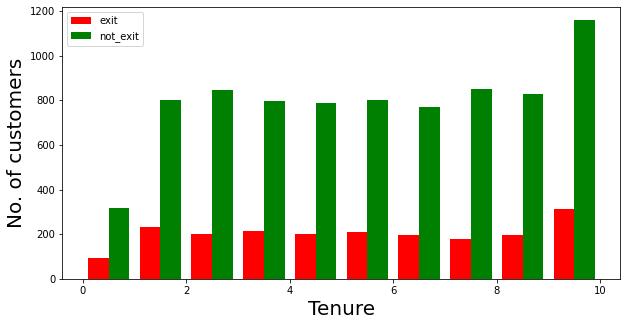

In [ ]:
visualization(df_churn_exited, df_churn_not_exited, "Tenure")

In [ ]:
df_churn_exited2 = df[df['Exited']==1]['Age']
df_churn_not_exited2 = df[df['Exited']==0]['Age']

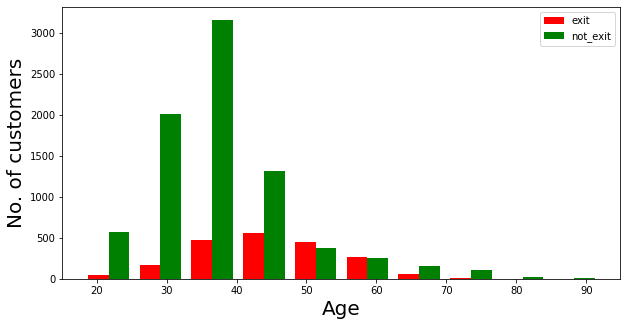

In [ ]:
visualization(df_churn_exited2, df_churn_not_exited2, "Age")

## Converting the Categorical Variables

In [ ]:
X = df[['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
states = pd.get_dummies(df['Geography'],drop_first = True)
gender = pd.get_dummies(df['Gender'],drop_first = True)

In [ ]:

df = pd.concat([df,gender,states], axis = 1)

## Splitting the training and testing Dataset

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
X = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Male','Germany','Spain']]

In [ ]:
y = df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

## Normalizing the values with mean as 0 and Standard Deviation as 1

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 1.68610581, -0.46622705, -1.73914869, ...,  0.90427302,
        -0.58658846, -0.56525206],
       [ 1.39679256, -0.08376023, -1.39175568, ..., -1.10586071,
        -0.58658846, -0.56525206],
       [-0.97970913, -0.94431058, -0.34957663, ...,  0.90427302,
        -0.58658846, -0.56525206],
       ...,
       [-0.58706972, -0.75307717,  1.38738845, ...,  0.90427302,
        -0.58658846, -0.56525206],
       [-1.49633993, -0.17937694,  0.3452094 , ..., -1.10586071,
         1.70477271, -0.56525206],
       [-0.91771344, -1.61362751,  0.3452094 , ..., -1.10586071,
        -0.58658846, -0.56525206]])

In [ ]:
X_test

array([[-1.35168331e+00, -1.61362751e+00,  1.03999544e+00, ...,
        -1.10586071e+00, -5.86588460e-01, -5.65252064e-01],
       [-1.44467685e+00, -7.53077166e-01, -1.73914869e+00, ...,
         9.04273015e-01,  1.70477271e+00, -5.65252064e-01],
       [ 7.35505132e-01,  2.03089881e-01,  6.92602419e-01, ...,
         9.04273015e-01, -5.86588460e-01, -5.65252064e-01],
       ...,
       [ 1.51045134e+00,  2.68912420e+00, -2.18361325e-03, ...,
         9.04273015e-01, -5.86588460e-01,  1.76912224e+00],
       [-1.43434424e+00,  2.03089881e-01,  1.03999544e+00, ...,
        -1.10586071e+00,  1.70477271e+00, -5.65252064e-01],
       [-4.83743561e-01, -8.48693871e-01,  1.03999544e+00, ...,
         9.04273015e-01, -5.86588460e-01, -5.65252064e-01]])

## Building the Classifier Model using Keras 

In [ ]:
import keras #Keras is the wrapper on the top of tenserflow
#Can use Tenserflow as well but won't be able to understand the errors initially. 

In [ ]:
from keras.models import Sequential #To create sequential neural network
from keras.layers import Dense #To create hidden layers

In [ ]:
classifier = Sequential()

In [ ]:
#To add the layers
#Dense helps to contruct the neurons
#Input Dimension means we have 11 features 
# Units is to create the hidden layers
#Uniform helps to distribute the weight uniformly
classifier.add(Dense(activation = "relu",input_dim = 11,units = 6,kernel_initializer = "uniform")) 

In [ ]:
classifier.add(Dense(activation = "relu",units = 6,kernel_initializer = "uniform"))   #Adding second hidden layers

In [ ]:
classifier.add(Dense(activation = "sigmoid",units = 1,kernel_initializer = "uniform")) #Final neuron will be having siigmoid function

In [ ]:
classifier.compile(optimizer="adam",loss = 'binary_crossentropy',metrics = ['accuracy']) #To compile the Artificial Neural Network. Ussed Binary crossentropy as we just have only two output

In [ ]:
classifier.summary() #3 layers created. 6 neurons in 1st,6neurons in 2nd layer and 1 neuron in last

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier.fit(X_train,y_train,batch_size=10,epochs=10) #Fitting the ANN to training dataset

Epoch 1/10
700/700 [==============================] - 2s 2ms/step - loss: 0.4076 - accuracy: 0.8339
Epoch 2/10
700/700 [==============================] - 2s 3ms/step - loss: 0.4063 - accuracy: 0.8327
Epoch 3/10
700/700 [==============================] - 2s 3ms/step - loss: 0.4054 - accuracy: 0.8347
Epoch 4/10
700/700 [==============================] - 1s 1ms/step - loss: 0.4046 - accuracy: 0.8350
Epoch 5/10
700/700 [==============================] - 1s 1ms/step - loss: 0.4037 - accuracy: 0.8363
Epoch 6/10
700/700 [==============================] - 1s 1ms/step - loss: 0.4029 - accuracy: 0.8369
Epoch 7/10
700/700 [==============================] - 1s 1ms/step - loss: 0.4026 - accuracy: 0.8371
Epoch 8/10
700/700 [==============================] - 1s 1ms/step - loss: 0.4022 - accuracy: 0.8377
Epoch 9/10
700/700 [==============================] - 1s 1ms/step - loss: 0.4017 - accuracy: 0.8369
Epoch 10/10
700/700 [==============================] - 1s 1ms/step - loss: 0.4012 - accuracy: 0.8363

In [ ]:
y_pred =classifier.predict(X_test)
y_pred = (y_pred > 0.5) #Predicting the result

94/94 [==============================] - 0s 835us/step


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[2301,   64],
       [ 454,  181]])

In [ ]:
accuracy = accuracy_score(y_test,y_pred)

In [ ]:
accuracy

0.8273333333333334

Text(69.0, 0.5, 'Truth')

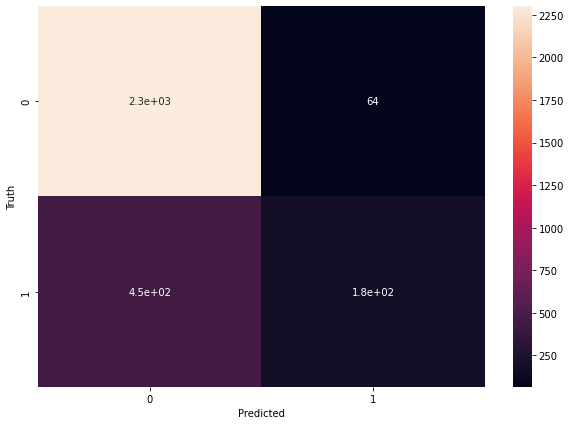

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2365
           1       0.74      0.29      0.41       635

    accuracy                           0.83      3000
   macro avg       0.79      0.63      0.66      3000
weighted avg       0.81      0.83      0.80      3000



# Assignment 4
## Implement Gradient Descent Algorithm to find the local minima of a function.
For example, find the local minima of the function y=(x+3)² starting from the point x=2.


##  We know the answer just by looking at the graph. y = (x+3)² reaches it’s minimum value when x = -3 (i.e when x=-3, y=0). Hence x=-3 is the local and global minima of the function.Below is the implementation in python 

In [ ]:
current_x = 2 # The algorithm starts at x=3
rate = 0.01 # Learning rate
precision = 0.000001 #This tells us when to stop the algorithm
previous_step_size = 1 
max_iters = 10000 # maximum number of iterations
iters = 0 #iteration counter
df = lambda x: 2*(x+3) #Gradient of our function

In [ ]:
while previous_step_size > precision and iters < max_iters: #When Previous Step SIze will be less than Precision then we will reach the global maxima
    previous_x = current_x #Store current x value in prev_x
    current_x = current_x - rate * df(previous_x) #Grad descent
    previous_step_size = abs(current_x - previous_x) #Change in x
    iters = iters+1 #iteration count
    print("Iteration",iters,"\nX value is",current_x) #Print iterations
    
print("The local minimum occurs at", current_x)

Iteration 1 
X value is 1.9
Iteration 2 
X value is 1.8019999999999998
Iteration 3 
X value is 1.70596
Iteration 4 
X value is 1.6118408
Iteration 5 
X value is 1.519603984
Iteration 6 
X value is 1.42921190432
Iteration 7 
X value is 1.3406276662336
Iteration 8 
X value is 1.253815112908928
Iteration 9 
X value is 1.1687388106507495
Iteration 10 
X value is 1.0853640344377344
Iteration 11 
X value is 1.0036567537489798
Iteration 12 
X value is 0.9235836186740002
Iteration 13 
X value is 0.8451119463005202
Iteration 14 
X value is 0.7682097073745098
Iteration 15 
X value is 0.6928455132270196
Iteration 16 
X value is 0.6189886029624792
Iteration 17 
X value is 0.5466088309032295
Iteration 18 
X value is 0.4756766542851649
Iteration 19 
X value is 0.40616312119946163
Iteration 20 
X value is 0.3380398587754724
Iteration 21 
X value is 0.27127906159996296
Iteration 22 
X value is 0.2058534803679637
Iteration 23 
X value is 0.14173641076060442
Iteration 24 
X value is 0.07890168254539233


# Assignment 5
KNN algorithm on diabetes dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

In [ ]:
df=pd.read_csv('diabetes.csv')

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

Check for null values. If present remove null values from the dataset

In [ ]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

Outcome is the label/target, other columns are features

In [ ]:
X = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [ ]:
from sklearn.preprocessing import scale
X = scale(X)
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
print("Confusion matrix: ")
cs = metrics.confusion_matrix(y_test,y_pred)
print(cs)

Confusion matrix: 
[[123  28]
 [ 37  43]]


In [ ]:
print("Acccuracy ",metrics.accuracy_score(y_test,y_pred))

Acccuracy  0.7186147186147186


Classification error rate: proportion of instances misclassified over the whole set of instances.
Error rate is calculated as the total number of two incorrect predictions (FN + FP) divided by the total number of a dataset (examples in the dataset.

Also error_rate = 1- accuracy

In [ ]:
total_misclassified = cs[0,1] + cs[1,0]
print(total_misclassified)
total_examples = cs[0,0]+cs[0,1]+cs[1,0]+cs[1,1]
print(total_examples)
print("Error rate",total_misclassified/total_examples)
print("Error rate ",1-metrics.accuracy_score(y_test,y_pred))

65
231
Error rate 0.2813852813852814
Error rate  0.2813852813852814


In [ ]:
print("Precision score",metrics.precision_score(y_test,y_pred))

Precision score 0.6056338028169014


In [ ]:
print("Recall score ",metrics.recall_score(y_test,y_pred))

Recall score  0.5375


In [ ]:
print("Classification report ",metrics.classification_report(y_test,y_pred))

Classification report                precision    recall  f1-score   support

           0       0.77      0.81      0.79       151
           1       0.61      0.54      0.57        80

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.71      0.72      0.71       231

